In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (20, 5)

# Introduction
K-Means is an unsupervised ML algorithm used to group data points into a predefined number of clusters. The "K" in K-Means is the number of clusters that is a predefined, and the algorithm clusters the data points into the defined K number of clusters. Meaning, the data points are classified into K clusters.

A training dataset of d-dimensions along with the K value is fed as input to the algorithm. For each of the row in the training data, the algorithm computes which cluster the data points belong to.

# K-Means Clustering
Consider a 2D dataset with K = 3, the 3 clusters are namely $S_1$, $S_2$ and $S_3$ with 3 centroids $C_1$, $C_2$ and $C_3$. In an ideal case,
- $S_1 \cup S_2 \cup S_3 = \text{Universal Set} = U$, and
- $S_1 \cap S_2 \cap S_3 = \text{Null Set} = \phi$

The above indicates that all of the data points belong to one or the other set and no data point exists in more than one set or cluster.

Now consider a set of points $S_i$ of size |$S_i$| (cardinality of the set). The centroid of this set can be found by summing all the points in the set (x_j) and averaging them by the size of the set (|$S_i$|). Mathematically,

$C_i$ = $\frac{1}{|S_i|} \sum{x_j} \backepsilon x_j \in S_i$

The "sum of data points" refers to the element-wise addition of all the data points within a cluster. For example, if a cluster has 3 data points,
- `x1 = [1, 2, 3]`
- `x2 = [4, 5, 6]`
- `x3 = [7, 8, 9]`

then, the sum of data points would be: `x1 + x2 + x3 = [1+4+7, 2+5+8, 3+6+9] = [12, 15, 18]`.

The goal is to find the centroids, $C_1$, $C_2$ and $C_3$, ..., $C_k$.

### How are clusters created using centroids?
Distance of a point is measured from all of the centroids, the point is then assigned to the cluster whose distance is the least from the centroid of that cluster.

### Mathematical formulation of K-Means
Given a dataset $D$, the goal is to find the clusters $S_1$, $S_2$ and $S_3$, ..., $S_k$ and their centroids, $C_1$, $C_2$ and $C_3$, ..., $C_k$ such that, the inter cluster distance is maximum (clear separation) and intra cluster distance is minimum (tight clustering).

Applying gradient descent does not help because, the result of gradient descent can be a fraction, and this does not help the case of clustering as data points can either belong to a cluster or not as a fractional value would mean that a data point would partially belong to a cluster. Also, in case the interger values are used to solve the optimization problem, the solution would have NP hard complexity.

To deal with the complexity problem, optimization is done using approximation algorithms. Lloyd's Algorithm is one such approximation algorithm.

### Lloyd's Algorithm
1. Initialization: From the given dataset $D$, $K$ points are picked at random, and are assumed to be the centroids. Let these be denoted as $C_1$, $C_2$ and $C_3$, ..., $C_k$.
2. Assignment: For each data point $x_i$ in the dataset, the distance of the data point from each of the $K$ centroids is computed. The centroid at the nearest is picked, let this be denoted as $C_j$. The point $x_i$ is assigned to the centroid $S_j$ which is associated with the centroid $C_j$.
3. Recompute the Centroid (update step): Now that all the data points have been grouped into their respective clusters, the centroid for each and every cluster is updated. The centroids are update using the equation, $C_i$ = $\frac{1}{|S_i|} \sum{x_j} \backepsilon x_j \in S_i$.
4. This assignment of data points to the cluster and updating the cluster centroids is repeated until convergence. The term convergence here points to the scenario where the cluster centroids do not change much.

# Scratch Implementation of K-Means Clustering on a Toy Dataset

In [3]:
# initializing the variables
data_size = 1000
num_iters = 5
num_clusters = 4

In [4]:
# initializing the data
from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples = 2000, centers = 4, n_features = 2, random_state = 0)

In [5]:
# initialize centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# creating a list to store what centroid is assigned to each cluster
assigned_centroids = np.zeros(len(data), dtype = np.int32)

In [6]:
# defining a method to compute the L2 distance
def compute_l2_distance(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in (centroids):
        # Compute the difference, following by raising to power 2 and summing
        new_dist = np.sqrt(((x - centroid) ** 2).sum(axis = 1)).reshape(-1,1)
        dist = np.hstack([dist,new_dist])
    return dist

In [7]:
# defining a method to extract the closest centroid
def extract_closest_centroid(x, centroids):
    # Loop over each centroid and compute the distance from data point.
    dist = compute_l2_distance(x, centroids)
    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)
    return closest_centroid_index

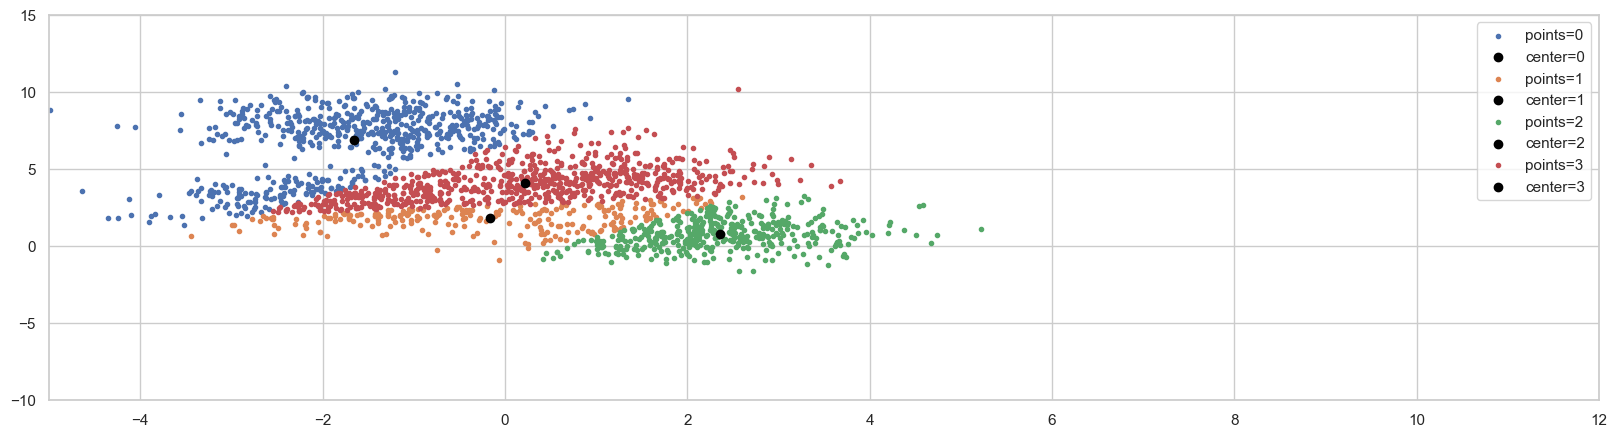

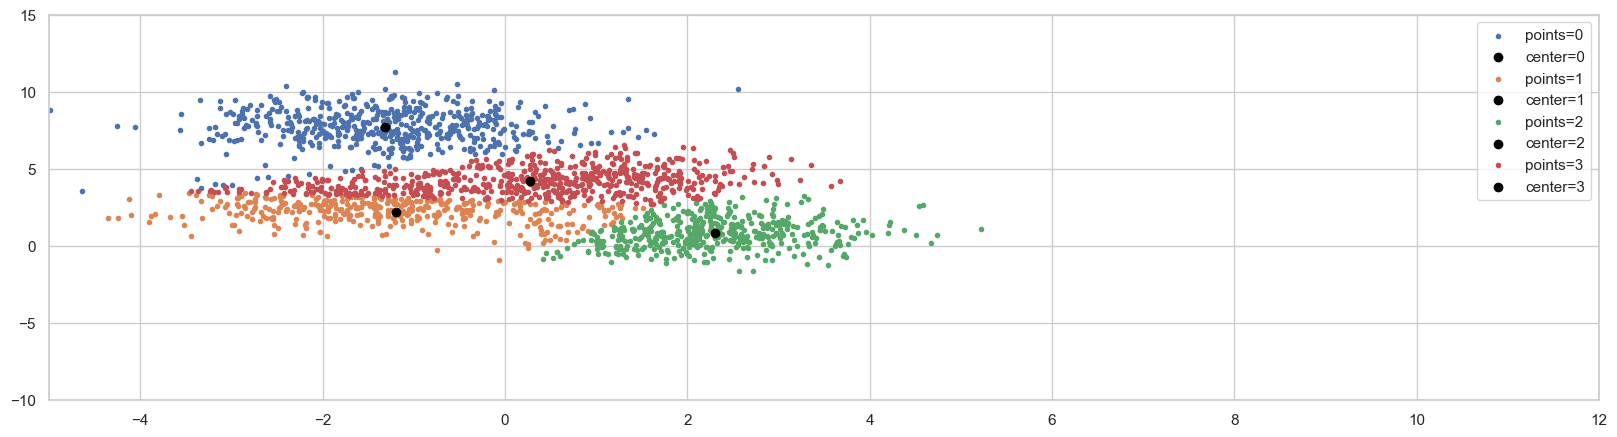

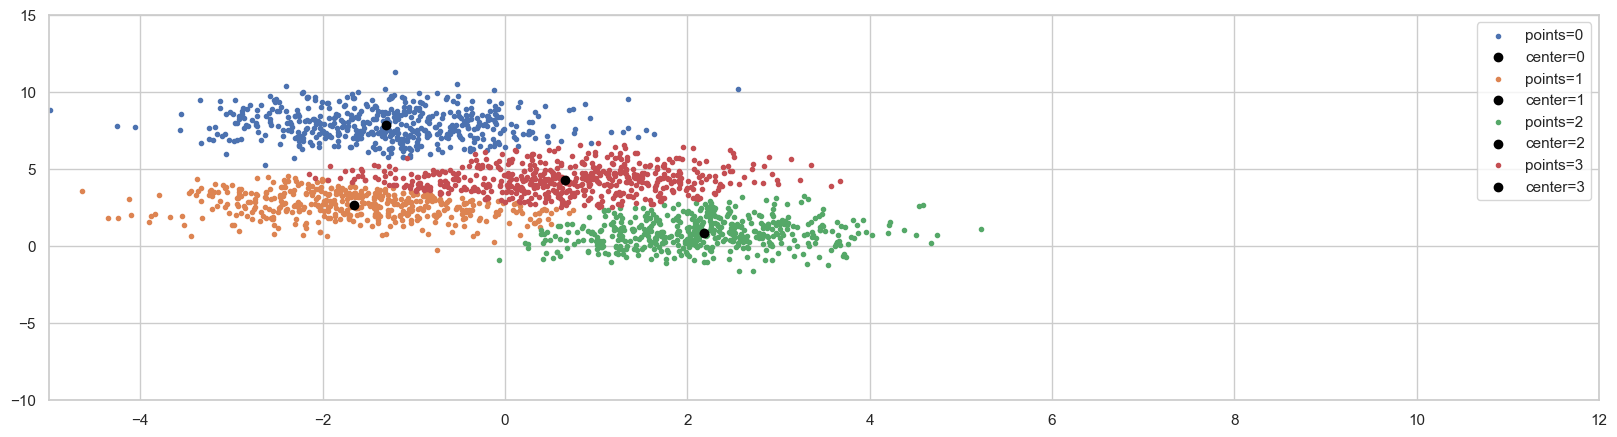

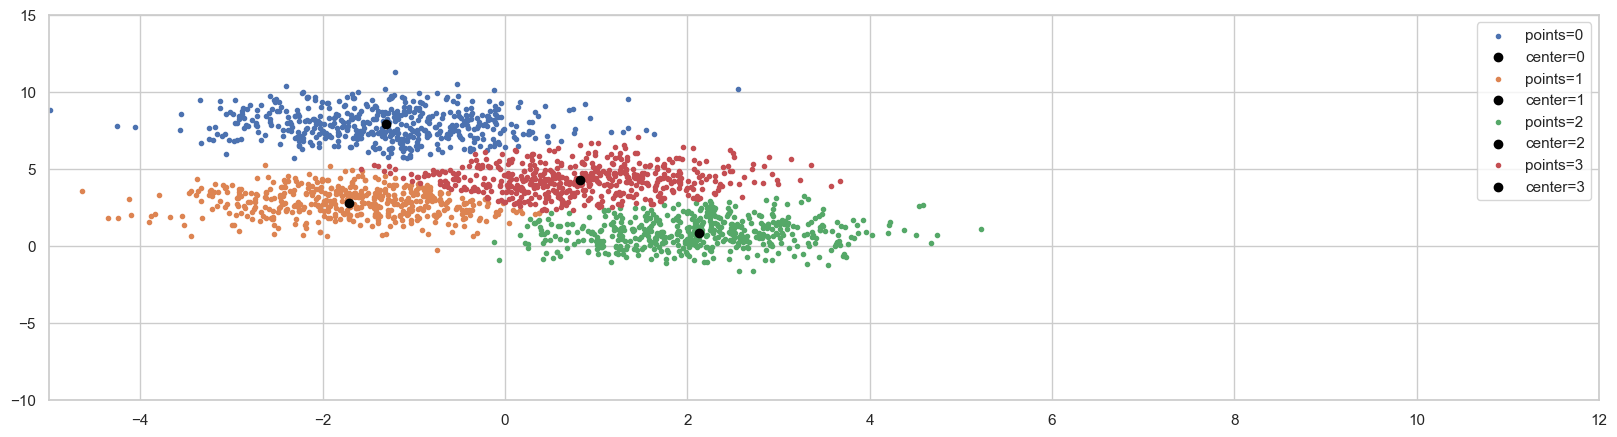

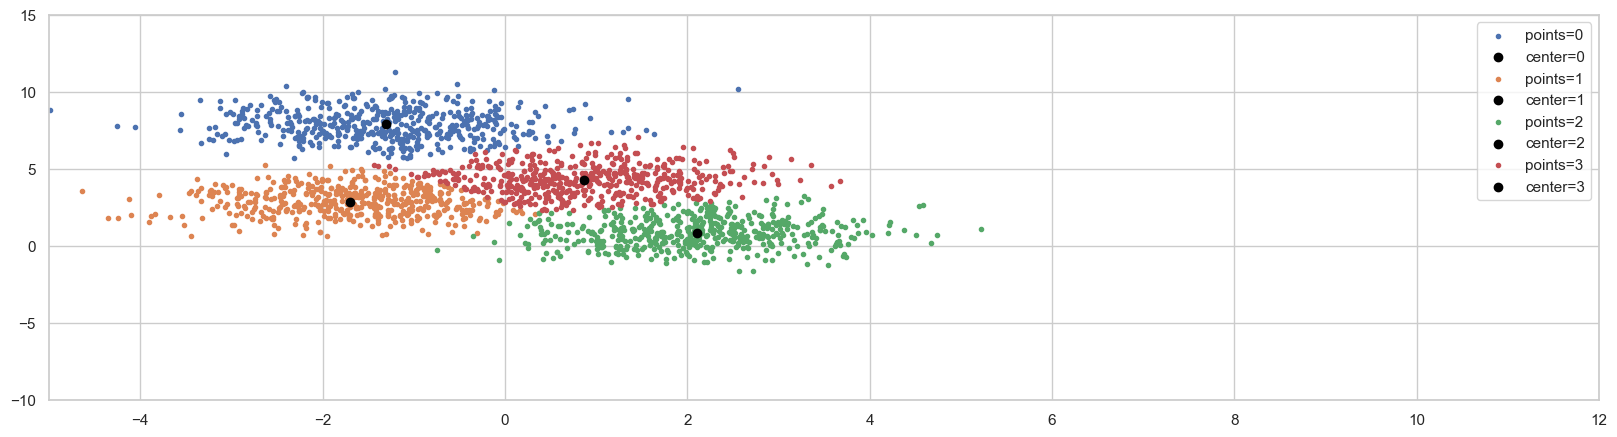

In [8]:
# Loop over iterations
for n in range(num_iters):
    # Get the closest centroid
    closest_centroid = extract_closest_centroid(data, centroids)
    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid
    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)
        # assign the new centroid
        centroids[c] = new_centroid
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = ".", label = f"points={c}")
        plt.scatter(centroids[c][0], centroids[c][1], color = "black", label = f"center={c}")
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

# Determining the K Value
The K (number of clusters) is determined using one of the following 2 ways,

### Domain Knowledge
If the problem contains a fixed number of clusters all the time, the K will be determined using domain knowledge. For example, if an automobile manufacturer wants to segregate its customers based on the type of car they purchase, the K value is set to the total different types of cars it manufactures (e.g., hatchback, saloon, SUV, etc.).

### Elbow Method
In this method, Within Cluster Sum of Squares (WCSS) is calculated. WCSS is the sum of square of distances of each data point in the dataset, from their assigned cluster centroids. In case there are 3 centorids, $C_1$, $C_2$ and $C_3$, WCSS is calculated as,

$WCSS = \sum distance(P_i, C_1)^2 + \sum distance(P_i, C_2)^2 + \sum distance(P_i, C_3)^2$

To determine the right value of K, consider the case where there is only one cluster. WCSS in this case would be very high, because the distance of all the points with only one centroid is considered. Now, WCSS is calculated for different values of K, say from K = 1 to 5. A plot of WCSS vs K is rendered, and the value at which WCSS stabilizes and does no significantly decreases is chosen as the best value for K.

WCSS is also called inertia.

NOTE: WCSS would be the lowest when each and every point in the dataset is a cluster.

# Library Implementation of K-Means on E-Commerce Dataset

In [9]:
df = pd.read_csv("E-commerce.csv")
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [10]:
len(df)

2500

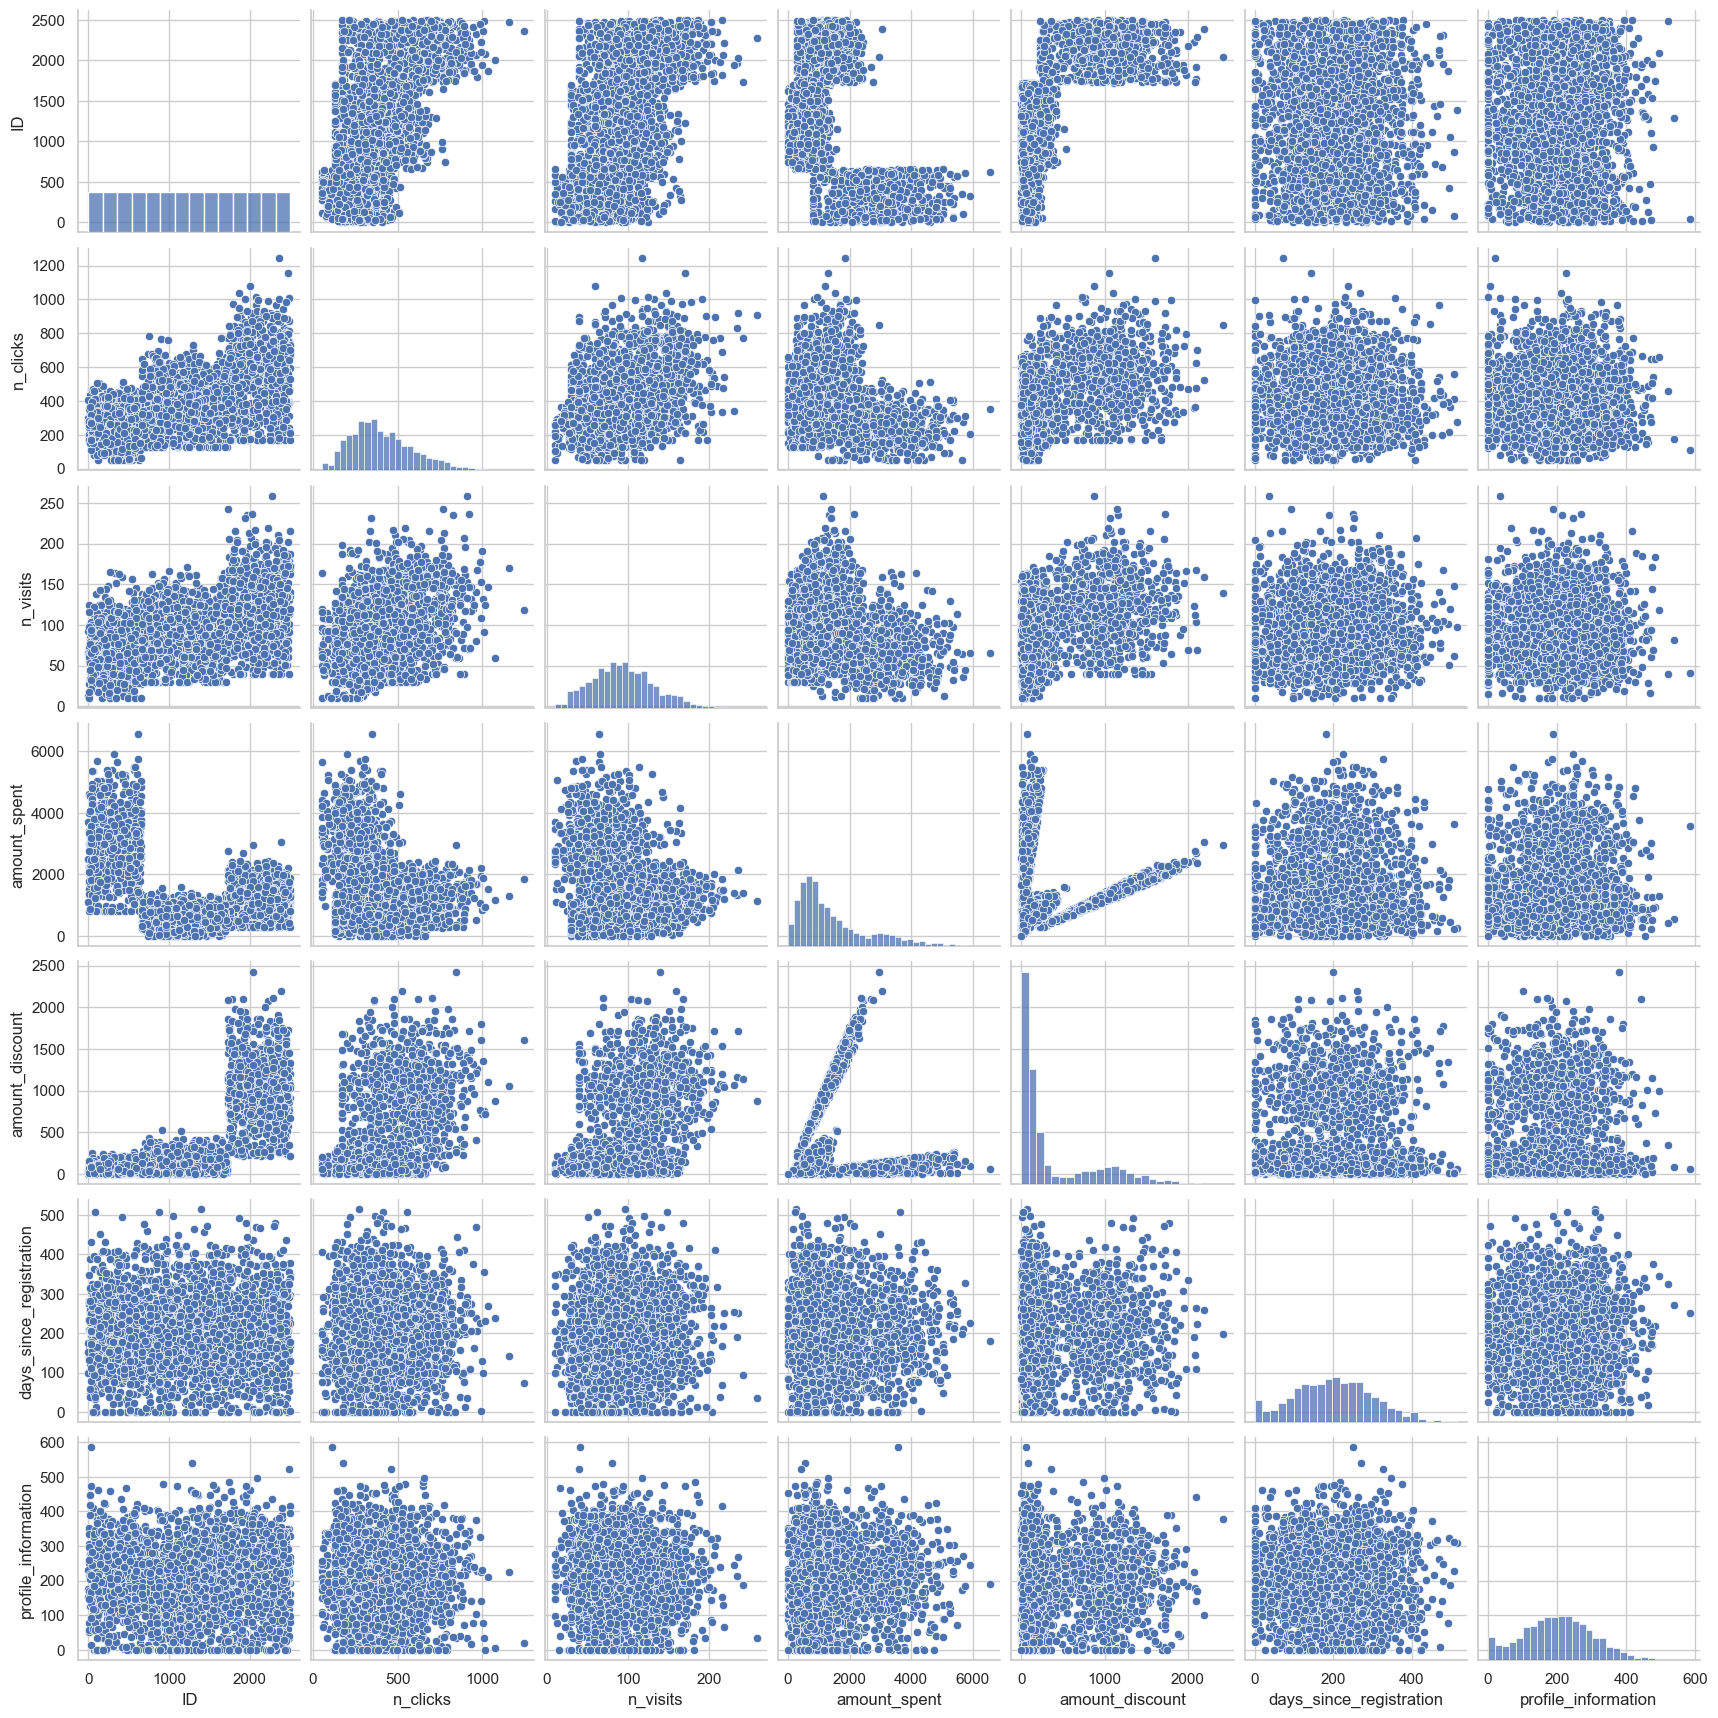

In [11]:
# visualization pairplot to spot for patterns
sns.pairplot(df)

Points that are closer together should have similar characteristics and hence could be placed in the same cluster. Pairplot helps in identifying such characteristics. If these clusters are identified the e-commerce website can,
- offer or show more discounted items to people who always buy discounted items.
- show quality products to people who buy expensive products or buy more often.
- identify segment of customers who explore a lot but do not end up buying.

### Dropping the "ID" feature
The "ID" feature/ variable/ column will not be helpful for clustering. This is because it represents unique identifier for each data point, it does not contain information relevant to the clustering task.

Also,
- Euclidean distance is not suitable for categorical variables, as it measures the distance between points in a continuous space. It's not appropriate for categorical variables, which represent discrete categories rather than continuous values.
- The K-Means algorithm is typically designed for numerical data. Using categorical variables directly with K-means might lead to inaccurate results due to the nature of the loss function (squared Euclidean distance).

In [12]:
# dropping the "ID" column from the DataFrame and assigning the result to a variable x 
x = df.drop(columns = ["ID"])
x.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,130,65,213.905831,31.600751,233,235
1,543,46,639.223004,5.689175,228,170
2,520,102,1157.402763,844.321606,247,409
3,702,83,1195.903634,850.041757,148,200
4,221,84,180.754616,64.283300,243,259


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [14]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
n_clicks,2500.0,408.680000,186.414090,50.0,274.750000,378.000000,522.000000,1246.000000
n_visits,2500.0,94.475600,38.866356,10.0,67.000000,92.000000,119.000000,259.000000
amount_spent,2500.0,1445.090745,1167.663473,0.0,609.618538,1036.189112,1949.270949,6567.402267
amount_discount,2500.0,388.508637,487.143968,0.0,56.298615,137.454623,679.540536,2428.406527
days_since_registration,2500.0,200.973600,99.136618,0.0,130.000000,200.000000,268.000000,514.000000
profile_information,2500.0,201.040400,100.139213,0.0,132.000000,201.000000,270.000000,585.000000


### Feature Scaling
Features are on a different scale, and K-Means is a distance based algorithm. For this reason it is very important to perform feature scaling. `MinMaxScaler()` is chosen in this case because the relative difference between the features has to be preserved for clustering problems.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

### Implementing K-Means from `sklearn.cluster`

In [16]:
from sklearn.cluster import KMeans

k = 4
model = KMeans(n_clusters = k, random_state = 42)
y_pred = model.fit_predict(x)
y_pred

array([0, 0, 2, ..., 3, 1, 2], dtype=int32)

In [17]:
# retrieving the coordinated of centroids of the clusters
model.cluster_centers_

array([[0.27325468, 0.32461027, 0.11241494, 0.06775629, 0.56591177,
        0.34694553],
       [0.16755788, 0.23248031, 0.5137293 , 0.03438439, 0.37827271,
        0.36657722],
       [0.45336783, 0.4704339 , 0.21776527, 0.47129454, 0.39159396,
        0.33704573],
       [0.28584837, 0.31519317, 0.10727553, 0.06266808, 0.23934893,
        0.32979174]])

### Visualizing Clusters

In [18]:
# creating a new DataFrame where a new column "label" is added 
# this consists of the cluster labels assigned by K-Means algorithm
clusters = pd.DataFrame(x, columns = df.drop(columns = ["ID"]).columns)
clusters["label"] = model.labels_
clusters.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,0
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,0
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,2
3,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880,2
4,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735,0


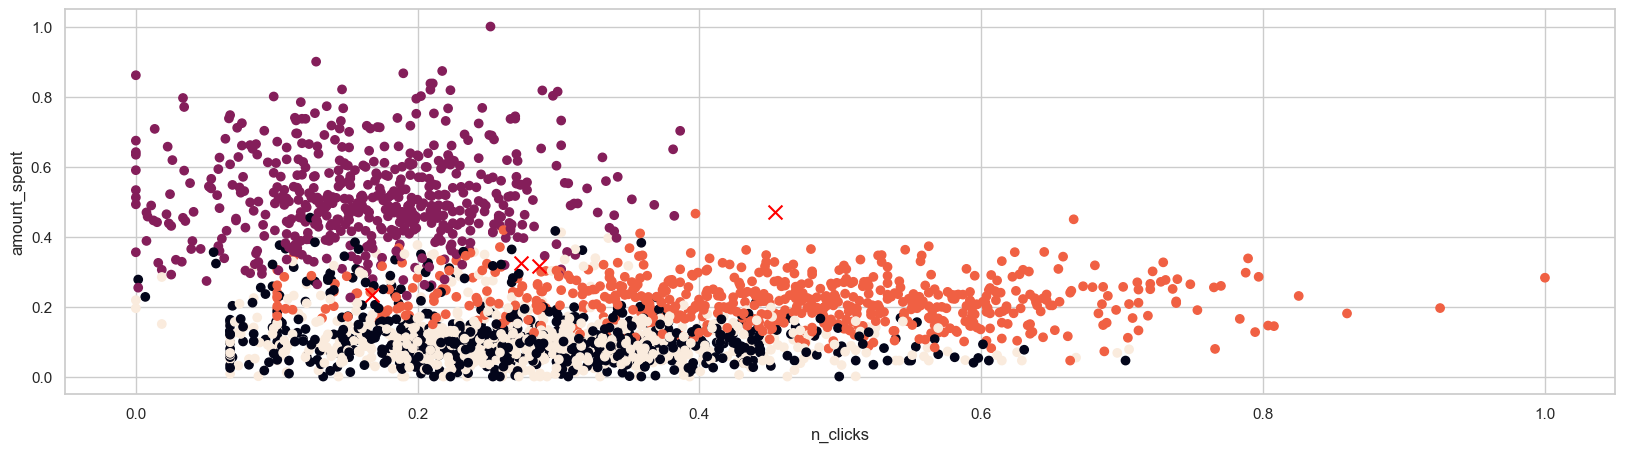

In [19]:
# defining a method to visualize the clusters
def viz_clusters(kmeans):
    plt.scatter(clusters["n_clicks"], clusters["amount_spent"], c = clusters["label"])
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = "red", marker = "x", s = 100)
    plt.xlabel("n_clicks")
    plt.ylabel("amount_spent")

viz_clusters(model)

In the above plot, some distinction can be observed, but making sense out of it is a bit hard. A better alternative would be a line polar plot which is useful for visualizing multi-dimensional data.

In [20]:
# grouping the customers by labels and calculating the mean for all the features
polar = clusters.groupby("label").mean().reset_index()
polar.head()

,label,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,0,0.273382,0.324739,0.112494,0.067776,0.566169,0.346869
1,1,0.167630,0.232054,0.513243,0.034365,0.378177,0.366129
2,2,0.453368,0.470434,0.217765,0.471295,0.391594,0.337046
3,3,0.285828,0.315516,0.106992,0.062711,0.239448,0.330160


In [21]:
# melting the data to have features on rows along with their corresponding mean values
polar = pd.melt(polar, id_vars = ["label"])

In [22]:
polar.head(5)

,label,variable,value
0,0,n_clicks,0.273382
1,1,n_clicks,0.167630
2,2,n_clicks,0.453368
3,3,n_clicks,0.285828
4,0,n_visits,0.324739


In [23]:
import plotly.express as px

fig = px.line_polar(polar, r = "value", theta = "variable", color = "label", line_close = True, height = 700, width = 800)
fig.show()

Polar plots are read and interpreted radially, further the value is away from the center, greater is its influence on the label.

### Insights from the line polar plot
- The blue(label 0), and purple (label 3) overlap on all features except one (i.e., day_since_registration).
- The different customer segments are,
    1. Bargain Shoppers - Label 2: 
        - People who buy heavily discounted items. 
        - Action: Show them more discounted items, They are also frequent users who joined the website relatively recently.
    2. Inactive Old Users - Label 0:
        - People who have been a long time user of the app but have not shown much interest off late.
        - Action: Start sending notifications, emails, etc to get them back.
    3. New and Inactive Users - Label 3:
        - Users who have recently joined but haven't bought much and are not that actively looking for items.
    4. Premium Shoppers - Label 1:
        - Affluent customers who do not visit the website often, do not click but spend a lot of money.
        - Action: Show them more quality.

### Trying with different values of K to see how the model performance gets affected.

In [24]:
# trying with K = 3, 4 and 5
model1 = KMeans(n_clusters = 3, init = "random", n_init = 1, algorithm = "full", random_state = 0)
model1.fit(x)

model2 = KMeans(n_clusters = 5, init = "random", n_init = 1, algorithm = "full", random_state = 0)
model2.fit(x)

model3 = KMeans(n_clusters = 8, init = "random", n_init = 1, algorithm = "full", random_state = 0)
model3.fit(x)

KMeans(algorithm='full', init='random', n_init=1, random_state=0)

Text(0.5, 1.0, 'K = 8')

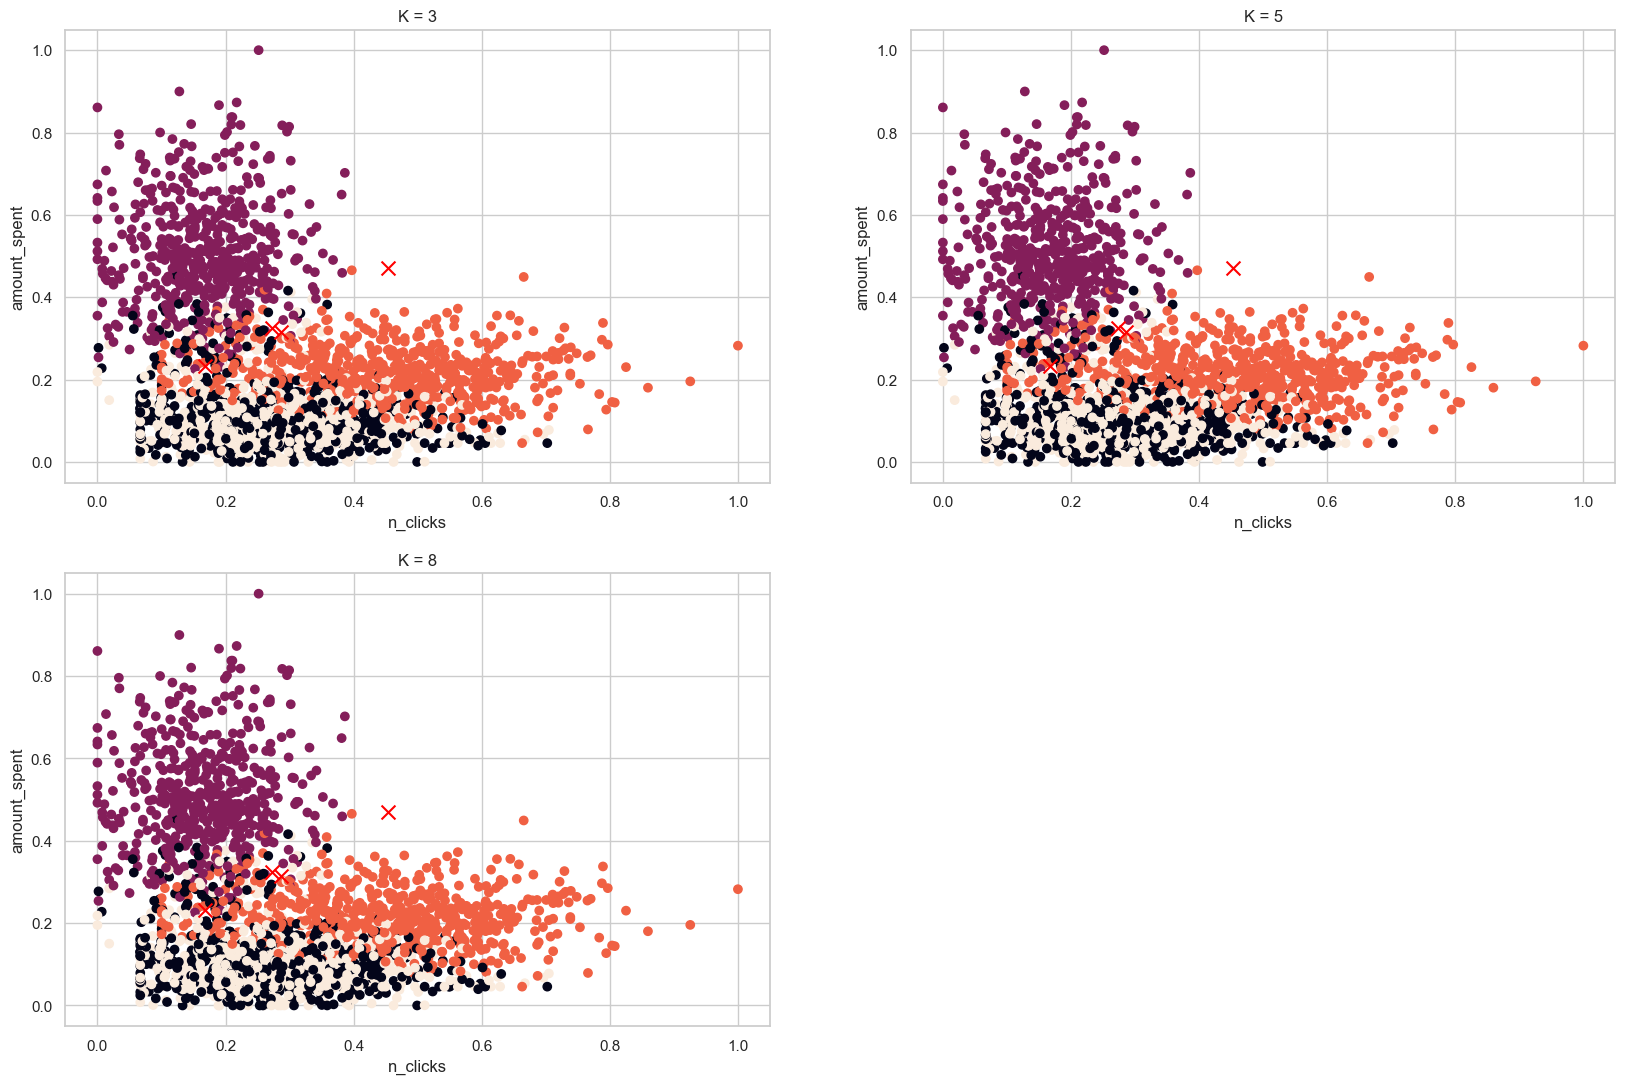

In [25]:
plt.figure(figsize=(20, 20))

plt.subplot(321)
viz_clusters(model1)
plt.title("K = 3")

plt.subplot(322)
viz_clusters(model2)
plt.title("K = 5")

plt.subplot(323)
viz_clusters(model3)
plt.title("K = 8")

The end results of K-Means depends on the number of clusters. WCSS or inertia is used to decide the ideal number of clusters.

In [26]:
model1.inertia_, model2.inertia_, model3.inertia_

(280.1650962612106, 234.8500598769407, 193.00182851000525)

As the number of clusters are increased, the WCSS or inertia decreases. But that doesn't mean a higher value is chosen for K. The best way to decide is to plot a graph of K vs Inertia, and choose a value where the drop in inertia is the sharp and then slows down for the consecutive values for K (elbow point).

The elbow method is not very precise as it replies on hum interpretation.

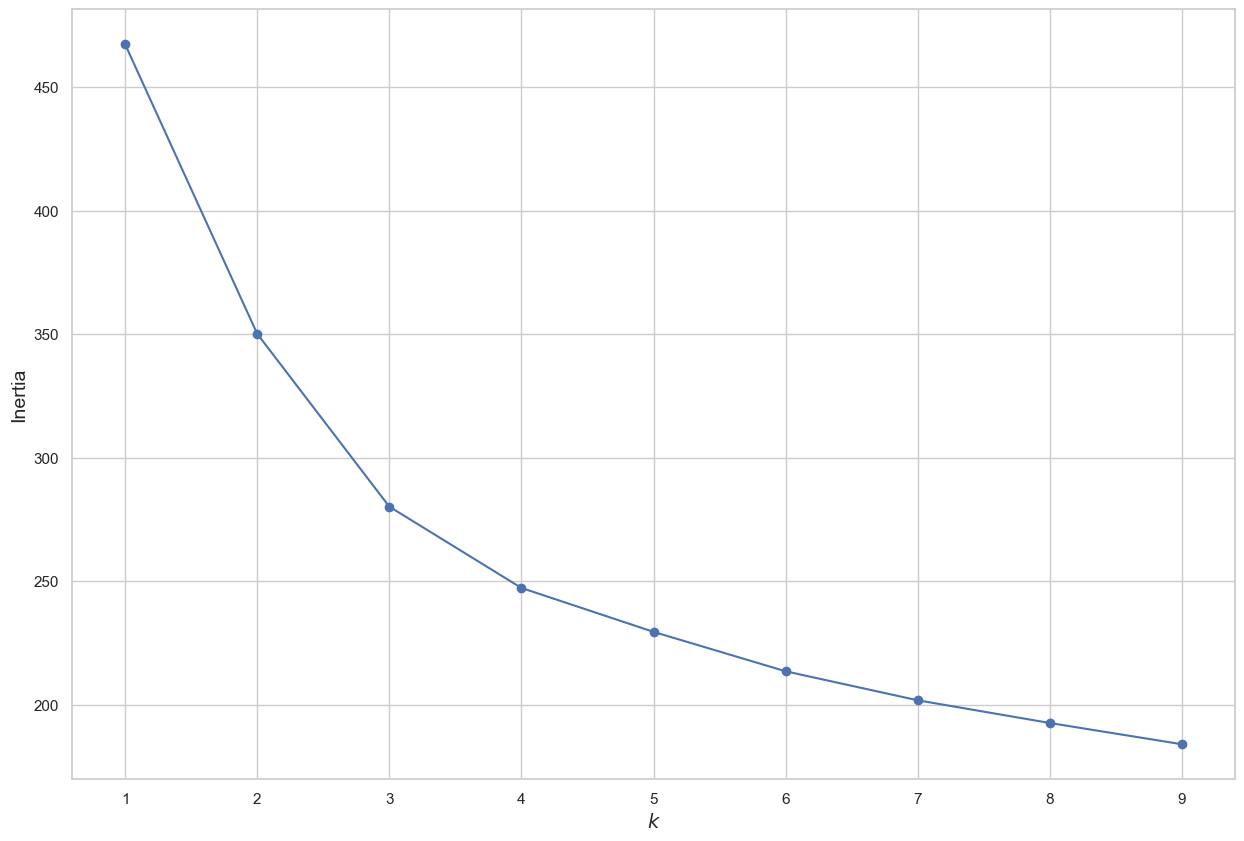

In [27]:
models = [KMeans(n_clusters = k, random_state = 0).fit(x) for k in range(1, 10)]
inertias = [i.inertia_ for i in models]

plt.figure(figsize = (15, 10))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Inertia", fontsize = 14)
plt.show()

For the above plot, a good inflection point would be 3 or 4. Meaning, a good K value would 3 or 4. Which is why a metric called Silhouette Score is a much better metric to decide on the best value of K.

# Silhouette Score
Silhouette score is a metric to evaluate the goodness of clusters. Silhouette score for a point $x_i$ is defined as,

$Sil(x_i) = \frac{b - a}{max(b, a)}$

Where,
- a = Average of within cluster distance of a point from other points in a cluster for $x_i$. Meaning, if there are 5 points in a cluster, then a is given by, $a = \frac{d_1 + d_2 + d_3 + d_4}{4}$.
- b = min(average distance from $x_i$ to other clusters). Meaning, if there are 2 clusters, the first one with 2 points, and the second one with 3 points. Then the distance of $x_i$ from 2 points in the first cluster is measured and then the average is taken ($\frac{d_1 + d_2}{2}$). The same is repeated for the points in the second cluster ($\frac{d_1 + d_2 +d_3}{3}$). Once the average distance is found between x_i and points in the 2 clusters, the minimum of both the averages is chosen.

The range of silhouette score is between -1 and +1. +1 signifying that the cluster is a good cluster.

If the silhouette score for the entire dataset is to be calculated, then silhouette score for each data point is found, and an average of all the silhouette score is calculated. This provides an overall measure of how well the data is clustered.

$\text{Silhouette Score} = \frac{1}{n}\sum_{i = 1}^{n}S_i$

Where,
- $S_i$ = Silhouette score for ith data point.
- n = Total number of data points.

### A Formal Explanation of Silhouette Score
- The silhouette score of a point measures how close that point lies to its nearest neighbor points, across all clusters.
- It provides information about clustering quality which can be used to determine whether further refinement by clustering should be performed on the current clustering.
- a is the mean intra-cluster distance (i.e., mean distance to the other instances in the same cluster).
- b is the nearest mean inter-cluster distance (i.e., the mean distance to the instances of the next closest cluster). It is defined such that the instance's own cluster is excluding.

In [28]:
# evaluating the algorithm for different values of K using silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(x, model.labels_)

0.2108404992330738

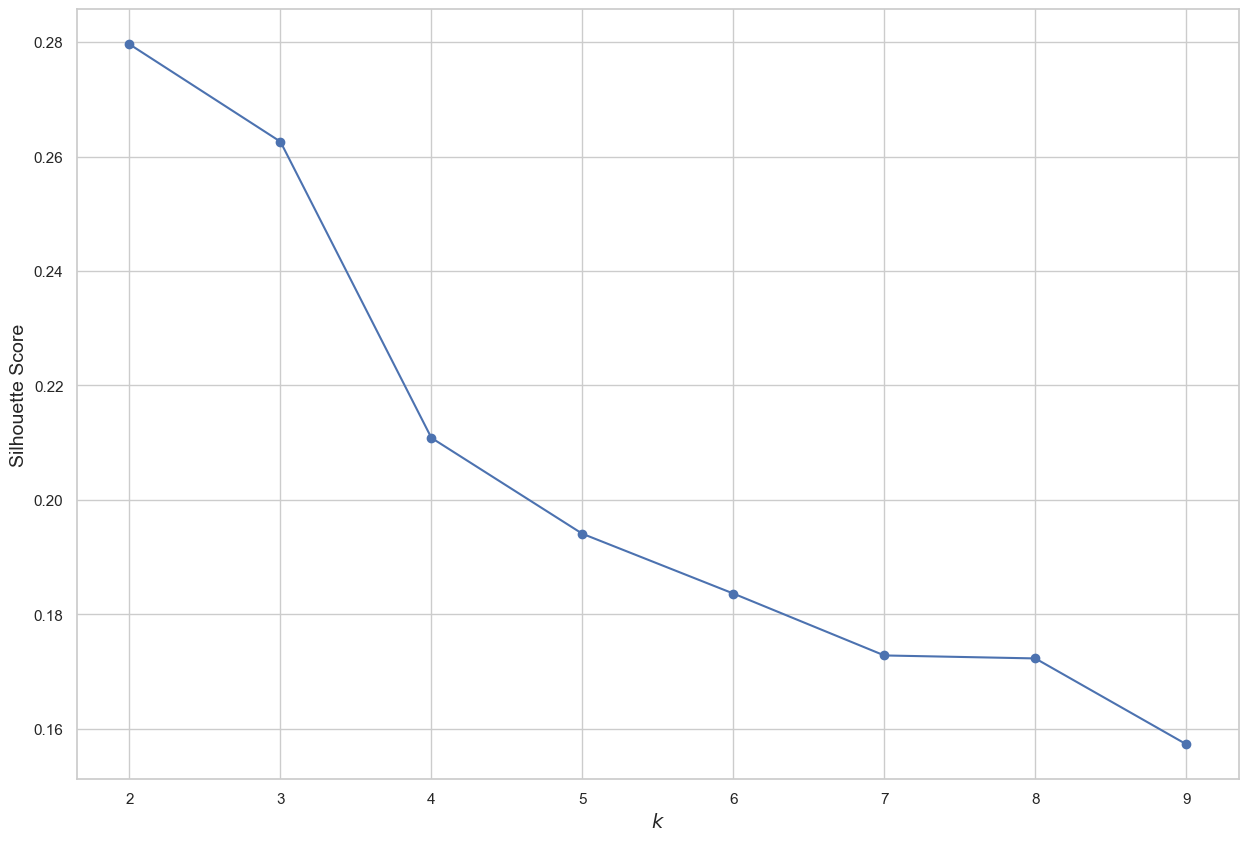

In [29]:
# plotting the silhouette scores for different values of K
silhouette_scores = [silhouette_score(x, model.labels_) for model in models[1:]]

plt.figure(figsize=(15, 10))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Silhouette Score", fontsize = 14)
plt.show()

K = 3 is a better choice according to Silhouette Score.

The strategy to pick K,
1. Silhouette score
2. Elbow method
3. Domain analysis

in that order i.e., 1 > 2 > 3.

# Time and Space Complexity of K-Means

### Time complexity
The time complexity of a single iteration of K-Means is generally considered to be,

$O(n * k * d)$

Where,
- N = number of data points
- K = number of clusters
- d = dimensionality of the data

### Space complexity
The space complexity of K-Means is typically,

$O(N + K * d)$

Where,
- N = number of data points
- K * d = storing the K clusters each with d features